In [64]:
import pandas as pd
import numpy as np

In [65]:
df = pd.read_csv('Train_set')
df.head()

,Unnamed: 0,tweet,label
0,0,The CDC currently reports 99031 deaths. In gen...,real
1,1,States reported 1121 deaths a small rise from ...,real
2,2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,4,Populous states can generate large case counts...,real


In [66]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [67]:
df.loc[df["label"] == "real", "label"] = 1
df.loc[df["label"] == "fake", "label"] = 0

In [68]:
df.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,1
1,States reported 1121 deaths a small rise from ...,1
2,Politically Correct Woman (Almost) Uses Pandem...,0
3,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,Populous states can generate large case counts...,1


In [69]:
# df.isnull().sum()

In [70]:
# import nltk

In [71]:
# nltk.download_shell()

In [72]:
# df.describe()

In [73]:
df['length'] = df['tweet'].apply(len)
df.head()

,tweet,label,length
0,The CDC currently reports 99031 deaths. In gen...,1,190
1,States reported 1121 deaths a small rise from ...,1,129
2,Politically Correct Woman (Almost) Uses Pandem...,0,131
3,#IndiaFightsCorona: We have 1524 #COVID testin...,1,204
4,Populous states can generate large case counts...,1,231


In [74]:
# df.shape

In [75]:
# df['label'].value_counts()

In [76]:
# df.info()

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

(0.0, 600.0)

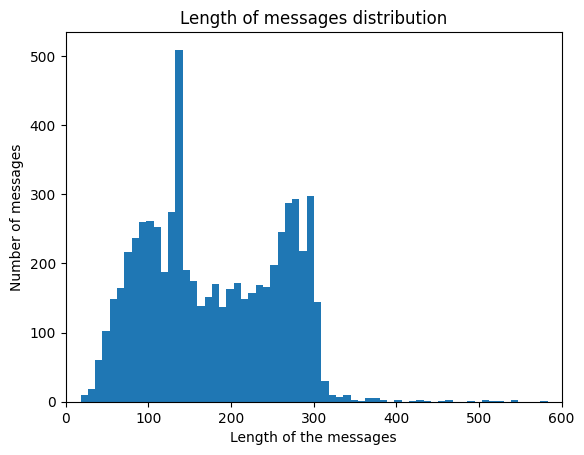

In [78]:
#To find the range of length of words
plt.xlabel("Length of the messages")
plt.ylabel("Number of messages")
plt.title("Length of messages distribution")
plt.hist(x = df['length'],bins = 1000)
plt.xlim(0,600)

(0.0, 600.0)

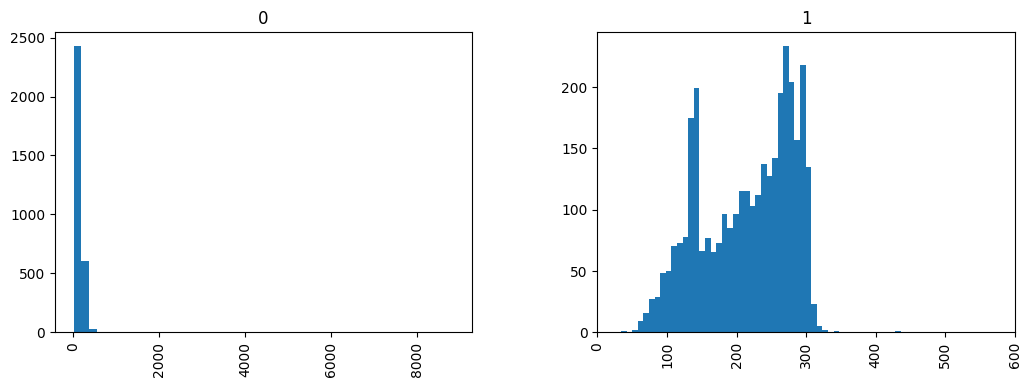

In [79]:
df.hist(column='length',by='label', bins = 50, figsize=(12,4))
# plt.title("Distribution of real and fake message length")
plt.xlim(0,600)

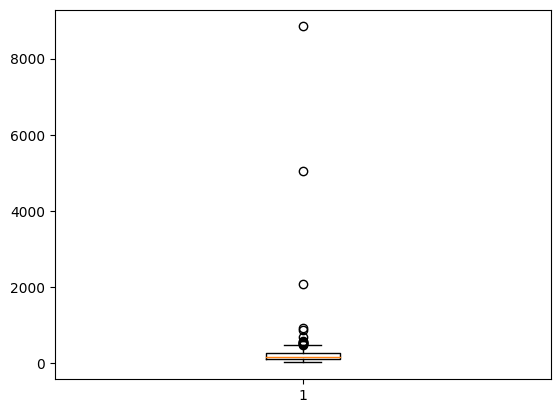

<Figure size 800x500 with 0 Axes>

In [80]:
plt.boxplot(df['length'])
fig = plt.figure(figsize =(8, 5))
plt.show()

In [81]:
max_length = 350
df = df[df['length'] <= max_length]
print(df)

                                                  tweet label  length
0     The CDC currently reports 99031 deaths. In gen...     1     190
1     States reported 1121 deaths a small rise from ...     1     129
2     Politically Correct Woman (Almost) Uses Pandem...     0     131
3     #IndiaFightsCorona: We have 1524 #COVID testin...     1     204
4     Populous states can generate large case counts...     1     231
...                                                 ...   ...     ...
6415  A tiger tested positive for COVID-19 please st...     0      79
6416  ???Autopsies prove that COVID-19 is??� a blood...     0     190
6417  _A post claims a COVID-19 vaccine has already ...     0     100
6418  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund     0      49
6419  It has been 93 days since the last case of COV...     1     213

[6380 rows x 3 columns]


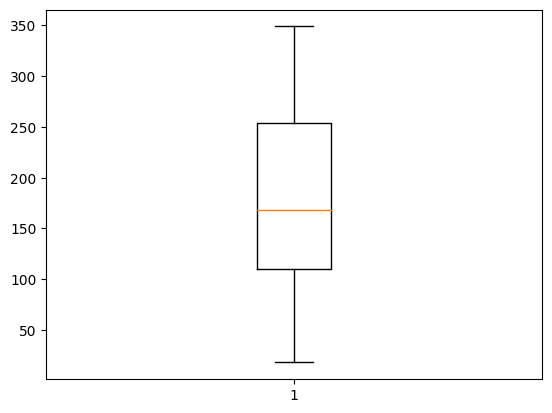

<Figure size 1000x700 with 0 Axes>

In [82]:
plt.boxplot(df['length'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [83]:
y = df['label']
y=y.astype('int')

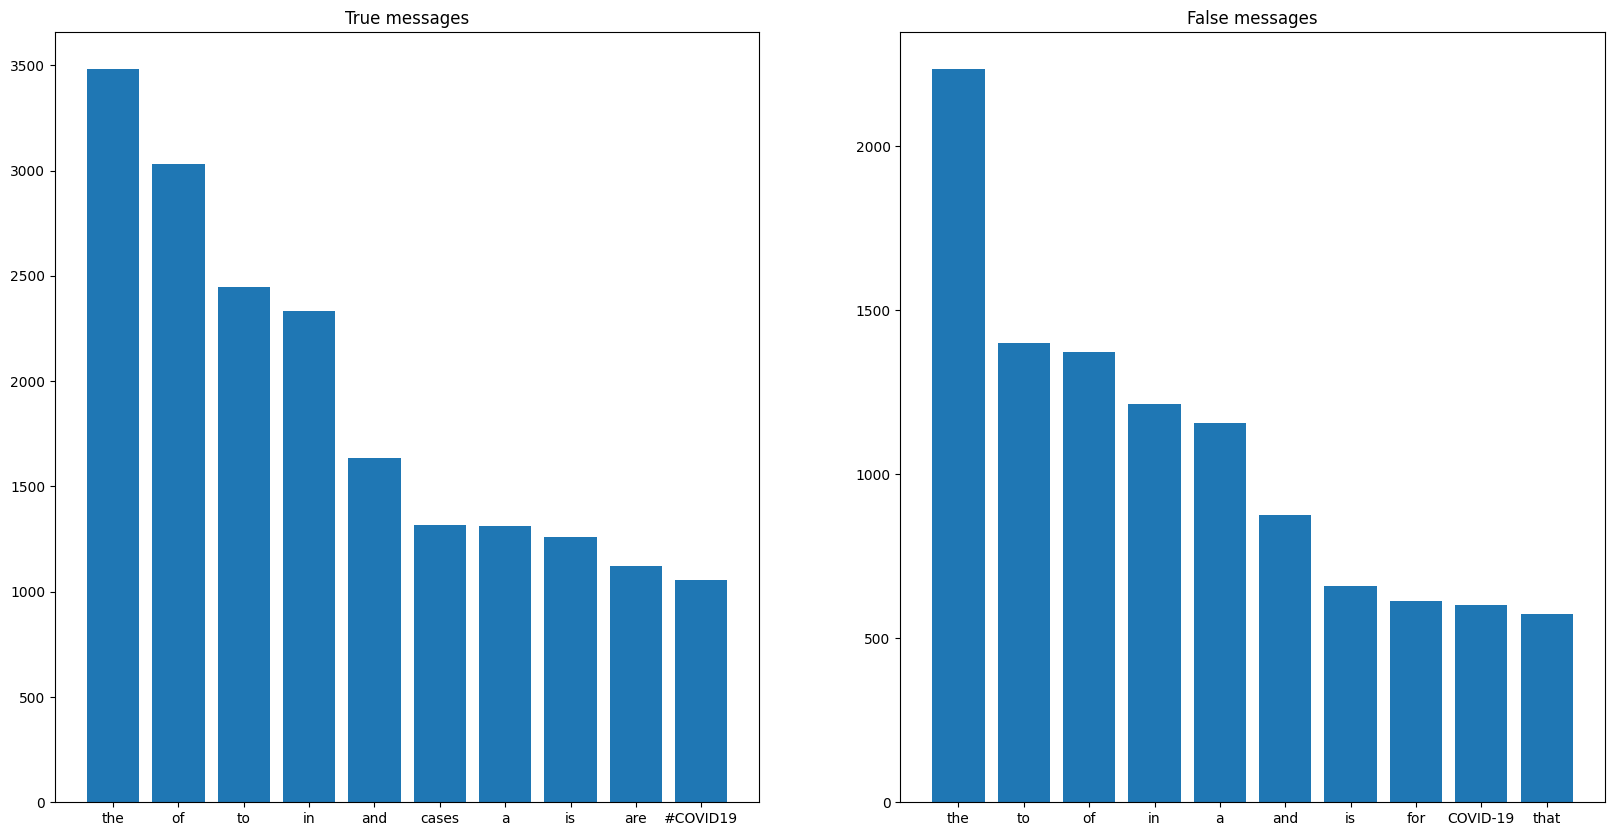

In [84]:
from collections import Counter
import matplotlib.pyplot as plt

# Separate the messages by their true/false label
true_messages = df[df['label'] == 1]['tweet']
false_messages = df[df['label'] == 0]['tweet']

# Count the frequency of words in the true messages
true_word_counts = Counter(" ".join(true_messages).split())

# Count the frequency of words in the false messages
false_word_counts = Counter(" ".join(false_messages).split())

# Extract the top N most frequent words from each class
N = 10
true_top_words = [word[0] for word in true_word_counts.most_common(N)]
false_top_words = [word[0] for word in false_word_counts.most_common(N)]

# Plot the word frequency distribution for each class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.bar(true_top_words, [true_word_counts[word] for word in true_top_words])
ax1.set_title('True messages')
ax2.bar(false_top_words, [false_word_counts[word] for word in false_top_words])
ax2.set_title('False messages')
plt.show()

In [24]:
import string
from nltk.corpus import stopwords

In [25]:
def text_process(message):
    """
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean words
    """
    
    nopunc = [char for char in message if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [26]:
def listToString(s):

    string = ' x'.join(s)

    return string

In [27]:
# df['tweet'] = df['tweet'].apply(text_process)
# df['tweet'] = df['tweet'].apply(listToString)

In [28]:
df.head()

,tweet,label,length
0,The CDC currently reports 99031 deaths. In gen...,1,190
1,States reported 1121 deaths a small rise from ...,1,129
2,Politically Correct Woman (Almost) Uses Pandem...,0,131
3,#IndiaFightsCorona: We have 1524 #COVID testin...,1,204
4,Populous states can generate large case counts...,1,231


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

The CountVectorizer class is instantiated with the analyzer parameter set to text_process. This tells the class to use the text_process function to preprocess the text before creating the bag-of-words representation.

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

In [32]:
pipeline.fit(df['tweet'])
X_train_transformed = pipeline.transform(df['tweet'])

## Models

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [34]:
model_MNB = MultinomialNB()
model_MNB.fit(X_train_transformed,y)

MultinomialNB()

In [35]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train_transformed,y)

RandomForestClassifier()

In [36]:
model_LR = LogisticRegression()
model_LR.fit(X_train_transformed,y)

LogisticRegression()

In [37]:
model_svm = svm.SVC()
model_svm.fit(X_train_transformed,y)

SVC()

## Processing on test dataset

In [38]:
test = pd.read_csv('Test_set')
test

,Unnamed: 0,tweet,Label
0,0,Our daily update is published. States reported...,real
1,1,Alfalfa is the only cure for COVID-19.,fake
2,2,President Trump Asked What He Would Do If He W...,fake
3,3,States reported 630 deaths. We are still seein...,real
4,4,This is the sixth time a global health emergen...,real
...,...,...,...
2135,2135,#CoronaVirusUpdates: State-wise details of Tot...,real
2136,2136,Tonight 12(midnight) onwards Disaster Manageme...,fake
2137,2137,296 new cases of #COVID19Nigeria; Plateau-85 E...,real
2138,2138,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real


In [39]:
test.drop('Unnamed: 0', inplace = True, axis = 1)
test.head()

,tweet,Label
0,Our daily update is published. States reported...,real
1,Alfalfa is the only cure for COVID-19.,fake
2,President Trump Asked What He Would Do If He W...,fake
3,States reported 630 deaths. We are still seein...,real
4,This is the sixth time a global health emergen...,real


In [40]:
test.loc[test["Label"] == "real", "Label"] = 1
test.loc[test["Label"] == "fake", "Label"] = 0

In [41]:
# test

In [42]:
y_test = test['Label']

In [43]:
test.drop('Label', inplace = True, axis = 1)

In [44]:
test['length'] = test['tweet'].apply(len)
test.head()

,tweet,length
0,Our daily update is published. States reported...,185
1,Alfalfa is the only cure for COVID-19.,38
2,President Trump Asked What He Would Do If He W...,124
3,States reported 630 deaths. We are still seein...,264
4,This is the sixth time a global health emergen...,176


In [45]:
X_test_transformed = pipeline.transform(test['tweet'])

In [46]:
pred_MNB = model_MNB.predict(X_test_transformed)

In [47]:
pred_LR = model_LR.predict(X_test_transformed)

In [48]:
pred_RFC = model_RFC.predict(X_test_transformed)

In [49]:
pred_svm = model_svm.predict(X_test_transformed)

In [50]:
y_test = y_test.to_numpy(dtype ='float32')

## Testing the model

Accuracies by all four models without removing stopwords: MNB = 90%
                               RFC = 92%
                               SVC = 94%
                               LR  = 93%

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [52]:
# def conf_matrix(actual,predicted):
#     cm = confusion_matrix(actual, predicted)
#     cm_df = pd.DataFrame(cm,index = ['Fake','True'], columns = ['Fake','True'])
#     plt.figure(figsize=(5,4))
#     sns.heatmap(cm_df, annot=True)
#     plt.title('Confusion Matrix')
#     plt.ylabel('Actal Values')
#     plt.xlabel('Predicted Values')
#     plt.show()

In [53]:
print(classification_report(y_test,pred_MNB))

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      1020
         1.0       0.86      0.97      0.91      1120

    accuracy                           0.90      2140
   macro avg       0.91      0.90      0.90      2140
weighted avg       0.91      0.90      0.90      2140



In [54]:
# conf_matrix(y_test,pred_MNB)

In [55]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      1020
         1.0       0.92      0.93      0.92      1120

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140



In [56]:
# conf_matrix(y_test,pred_RFC)

In [57]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      1020
         1.0       0.94      0.95      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140



In [58]:
# conf_matrix(y_test,pred_svm)

In [59]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1020
         1.0       0.92      0.94      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.92      0.92      2140
weighted avg       0.93      0.93      0.93      2140



In [60]:
# conf_matrix(y_test,pred_LR)

## For direct input from user

In [61]:
inp = input("Enter the news to be verified: ")

Enter the news to be verified: 


In [62]:
X_input = pipeline.transform([inp])

In [ ]:
pred_svm_inp = model_svm.predict(X_input)
pred_svm_inp